In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader.yahoo.daily import YahooDailyReader
import yfinance as yf

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['GOOG','MSFT']

# Set up End and Start times for data grab

end = datetime.now()
start = datetime(end.year - 2, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [GOOG, MSFT]
company_name = ["GOOGLE", "MSFT"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-01-26 00:00:00-05:00,243.649994,248.309998,242.000000,248.000000,248.000000,33454500,MSFT
2023-01-27 00:00:00-05:00,248.990005,249.830002,246.830002,248.160004,248.160004,26480800,MSFT
2023-01-30 00:00:00-05:00,244.509995,245.600006,242.199997,242.710007,242.710007,25867400,MSFT
2023-01-31 00:00:00-05:00,243.449997,247.949997,242.949997,247.809998,247.809998,26541100,MSFT
2023-02-01 00:00:00-05:00,248.000000,255.179993,245.470001,252.750000,252.750000,31259900,MSFT
2023-02-02 00:00:00-05:00,258.820007,264.690002,257.250000,264.600006,264.600006,39940400,MSFT
2023-02-03 00:00:00-05:00,259.540009,264.200012,257.100006,258.350006,258.350006,29062300,MSFT
2023-02-06 00:00:00-05:00,257.440002,258.299988,254.779999,256.769989,256.769989,22518000,MSFT
2023-02-07 00:00:00-05:00,260.529999,268.769989,260.079987,267.559998,267.559998,50841400,MSFT


In [2]:
GOOG.describe()

,Open,High,Low,Close,Adj Close,Volume
count,505.000000,505.000000,505.000000,505.000000,505.000000,5.050000e+02
mean,120.436908,121.834878,119.096425,120.462786,120.462786,2.660458e+07
std,17.854734,17.753911,17.755240,17.752889,17.752889,1.004536e+07
min,85.510002,86.550003,83.449997,83.489998,83.489998,8.567800e+06
25%,104.250000,106.099998,103.500000,104.794502,104.794502,1.995550e+07
50%,118.420998,119.862000,117.116898,118.779999,118.779999,2.436510e+07
75%,137.109695,138.399506,135.699997,137.004501,137.004501,3.029200e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,8.975000e+07


In [3]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2021-02-08 00:00:00-05:00 to 2023-02-08 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          505 non-null    float64
 1   High          505 non-null    float64
 2   Low           505 non-null    float64
 3   Close         505 non-null    float64
 4   Adj Close     505 non-null    float64
 5   Volume        505 non-null    int64  
 6   company_name  505 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 31.6+ KB


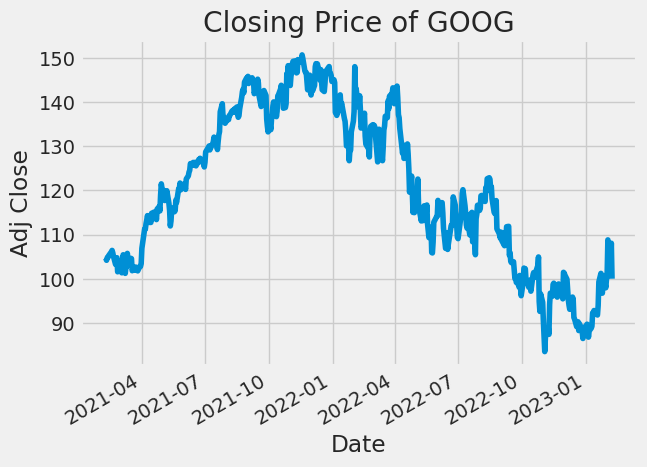

In [4]:
GOOG['Adj Close'].plot()
plt.ylabel("Adj Close")
plt.xlabel("Date")
plt.title('Closing Price of GOOG')

plt.show()

In [5]:
df = DataReader('GOOG', data_source='stooq', start='2014-01-01', end=datetime.now())


In [6]:
#df.sort_values()

Text(0, 0.5, 'Close Price (USD)')

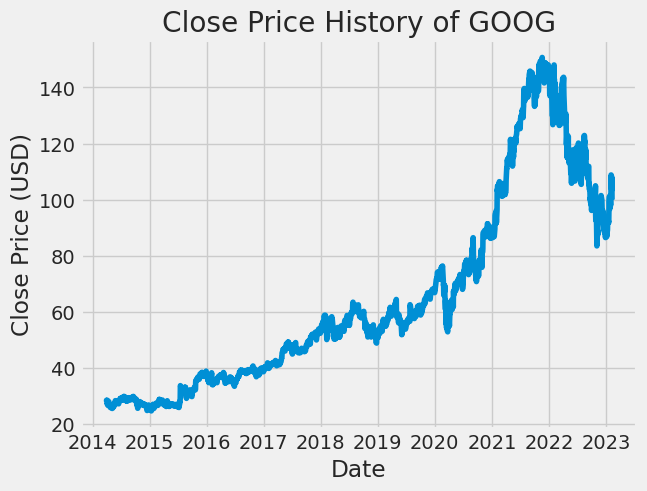

In [7]:
plt.title('Close Price History of GOOG')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')

In [8]:
data = df.filter(items=['Close'])[-1::-1]
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.8))
training_data_len

1788

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02613786],
       [0.02674461],
       [0.02554697],
       ...,
       [0.62532965],
       [0.66157604],
       [0.59780777]])

In [10]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []


dat_size = 100
pred_size = 10

for i in range(dat_size, len(train_data)-pred_size, pred_size):
    x_train.append(train_data[i-dat_size:i, 0])
    y_train.append(train_data[i:i+pred_size, 0])
    if i<= dat_size+1:
        print(x_train)
        print(y_train)
        print()
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

[array([0.02613786, 0.02674461, 0.02554697, 0.029588  , 0.02952455,
       0.03061115, 0.02006242, 0.01808354, 0.02472607, 0.02839037,
       0.01919393, 0.01508945, 0.01585086, 0.01740541, 0.02537644,
       0.01727057, 0.01430424, 0.016759  , 0.013638  , 0.01293211,
       0.00937092, 0.00975559, 0.0139394 , 0.01352696, 0.01538687,
       0.01403061, 0.01398302, 0.00895849, 0.00690426, 0.0073167 ,
       0.01038217, 0.01481978, 0.0160769 , 0.013523  , 0.01087788,
       0.01113565, 0.01439942, 0.01476029, 0.01839683, 0.02082383,
       0.02385362, 0.02910816, 0.02741481, 0.0267803 , 0.02670495,
       0.0243414 , 0.02077624, 0.0206652 , 0.0243295 , 0.02529316,
       0.0275893 , 0.02696668, 0.02628855, 0.02331825, 0.02348084,
       0.02051451, 0.02001087, 0.02411932, 0.02472607, 0.02530506,
       0.02871159, 0.02858072, 0.03414458, 0.03309367, 0.03358542,
       0.03280814, 0.03573879, 0.03560792, 0.03655572, 0.03557223,
       0.03114652, 0.0331254 , 0.03115049, 0.03435476, 0.0366

In [11]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(10))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

2023-02-08 17:36:55.711432: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-08 17:36:56.915754: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-08 17:36:56.915797: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: st4eve-precision5530
2023-02-08 17:36:56.915803: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: st4eve-precision5530
2023-02-08 17:36:56.915902: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 525.85.5
2023-02-08 17:36:56.915920

168/168 [==============================] - 6s 24ms/step - loss: 0.0031


In [12]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - dat_size: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(dat_size, len(test_data)):
    x_test.append(test_data[i-dat_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

14/14 [==============================] - 1s 23ms/step


7.2415123410943085

In [13]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

ValueError: Expected a 1D array, got an array with shape (446, 10)

In [33]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import RNN, LSTMCell
from tensorflow.keras.backend import dot
from tensorflow.keras import activations, initializers
from keras.models import Sequential
tf.random.set_seed(100)

In [36]:
class LSTM(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        self.units = 2*units
        self.state_size = [self.units, self.units]
        
        self.activation = activations.get('tanh')
        self.recurrent_activation = activations.get('hard_sigmoid')
        self.kernel_initializer = initializers.glorot_uniform(seed=1000)
        self.recurrent_initializer = initializers.get('orthogonal')
        self.bias_initializer = initializers.get('zeros')
        
        super(LSTM, self).__init__(**kwargs)

    def build(self, input_shape):
        self.ft = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ft')
        self.ft_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='ft_b')
        self.c = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ct')
        self.c_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='c_b')
        self.o = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ot')
        self.o_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='o_b')
        self.it = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='it')
        self.it_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='i_b')

        self.built = True

    def call(self, inputs, states):
        h,c = states[0], states[1]
        
        x = tf.concat([h,inputs], axis=-1)
        
        y_ft = self.recurrent_activation(dot(x, self.ft) + self.ft_b)
        
        y_it = self.recurrent_activation(dot(x, self.it) + self.it_b)
        
        y_c = self.activation(dot(x, self.c) + self.c_b)
        
        
        c = c * y_ft + y_it * y_c
        
        y_o = self.recurrent_activation(dot(x, self.o) + self.o_b)
        
        
        h = y_o * self.activation(c)
        
        output = h
        
        return output, [h,c]

In [37]:
# Build the LSTM model
cell = LSTM(8)
layer = RNN(cell, return_sequences=True)

cell2 = LSTM(300)
layer2 = RNN(cell2, return_sequences=False)
model = Sequential()
model.add(layer)
model.add(layer2)
model.add(Dense(35))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

168/168 [==============================] - 32s 179ms/step - loss: 0.0047


In [23]:
#Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - dat_size: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(dat_size, len(test_data)):
    x_test.append(test_data[i-dat_size:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)


# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

forecast = np.zeros([len(x_test), 1])
x_now = x_test[0].reshape(1,x_test.shape[1],1)
print(x_now[0])
for i in range(len(forecast)):
    x_ = model.predict(x_now)
        
    forecast[i] = x_
    
    x_now[:][:-1] = x_now[:][1:]
    if (i%len(forecast) == 0):
        x_now[:][-1] = x_test[i]
    else:
        x_now[:][-1] = x_

print(x_now[0])

forecast = scaler.inverse_transform(forecast)


# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(rmse)

rmse2 = np.sqrt(np.mean(((forecast - y_test) ** 2)))
print(rmse2)

14/14 [==============================] - 2s 109ms/step
[[0.52585034]
 [0.51220044]
 [0.50871064]
 [0.51126454]
 [0.50265503]
 [0.50571257]
 [0.50382094]
 [0.49783275]
 [0.4911347 ]
 [0.49445002]
 [0.48815647]
 [0.491678  ]
 [0.4942438 ]
 [0.50901203]
 [0.50212363]
 [0.4945095 ]
 [0.4994111 ]
 [0.49003621]
 [0.4950647 ]
 [0.49283202]
 [0.51343774]
 [0.52135325]
 [0.50529618]
 [0.49729738]
 [0.50041045]
 [0.49477124]
 [0.49318893]
 [0.51486935]
 [0.55295583]
 [0.5546809 ]
 [0.55856728]
 [0.55791294]
 [0.56498773]
 [0.53070435]
 [0.54352145]
 [0.53266736]
 [0.55868625]
 [0.56906049]
 [0.62559931]
 [0.6225378 ]
 [0.63667152]
 [0.63465695]
 [0.6309292 ]
 [0.63563251]
 [0.63583079]
 [0.63909852]
 [0.64614951]
 [0.64869549]
 [0.64428564]
 [0.63791674]
 [0.62353716]
 [0.62590864]
 [0.63554526]
 [0.61024417]
 [0.6124253 ]
 [0.63013606]
 [0.62788355]
 [0.60840409]
 [0.6172793 ]
 [0.64085135]
 [0.60738887]
 [0.61870695]
 [0.61963492]
 [0.64331801]
 [0.62236331]
 [0.62417167]
 [0.63449832]
 [0.633

1/1 [==============================] - 0s 32ms/step
[[2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.46722484]
 [2.467224

/tmp/ipykernel_64395/1784730816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
/tmp/ipykernel_64395/1784730816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Forecast'] = forecast


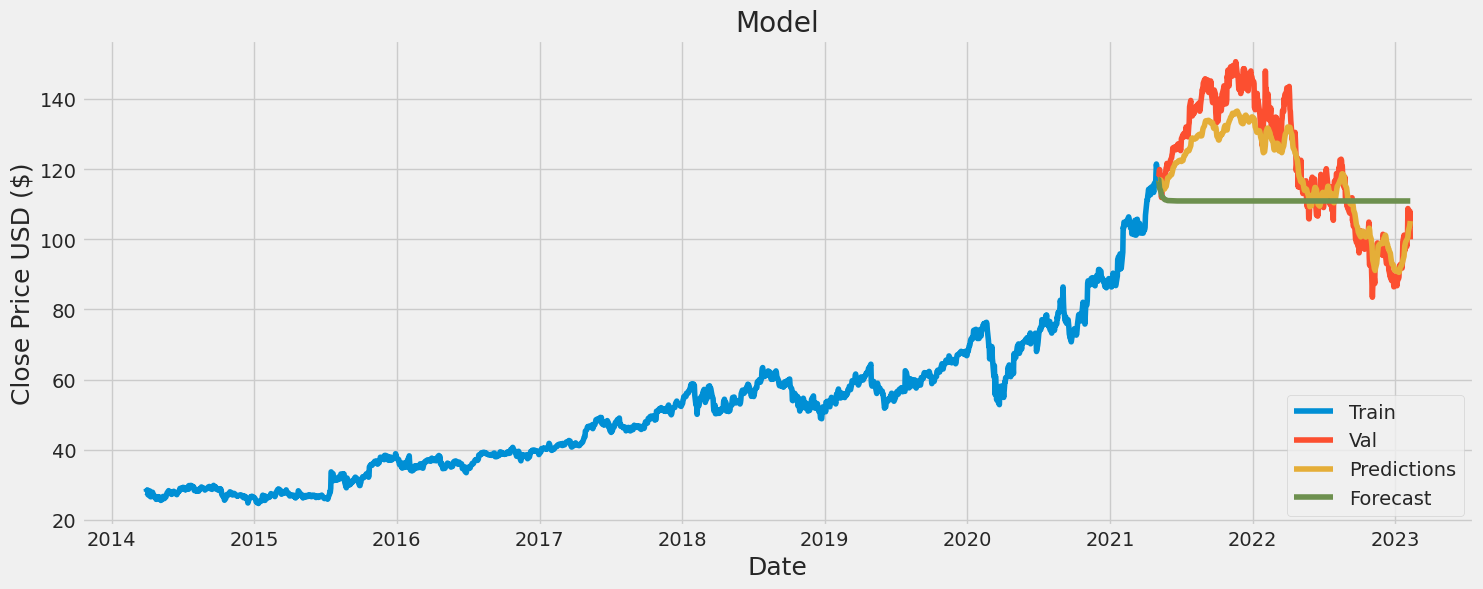

In [18]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Forecast'] = forecast
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions', 'Forecast']])
plt.legend(['Train', 'Val', 'Predictions', 'Forecast'], loc='lower right')
plt.show()

/tmp/ipykernel_64395/178313092.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions
/tmp/ipykernel_64395/178313092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Forecast'] = forecast


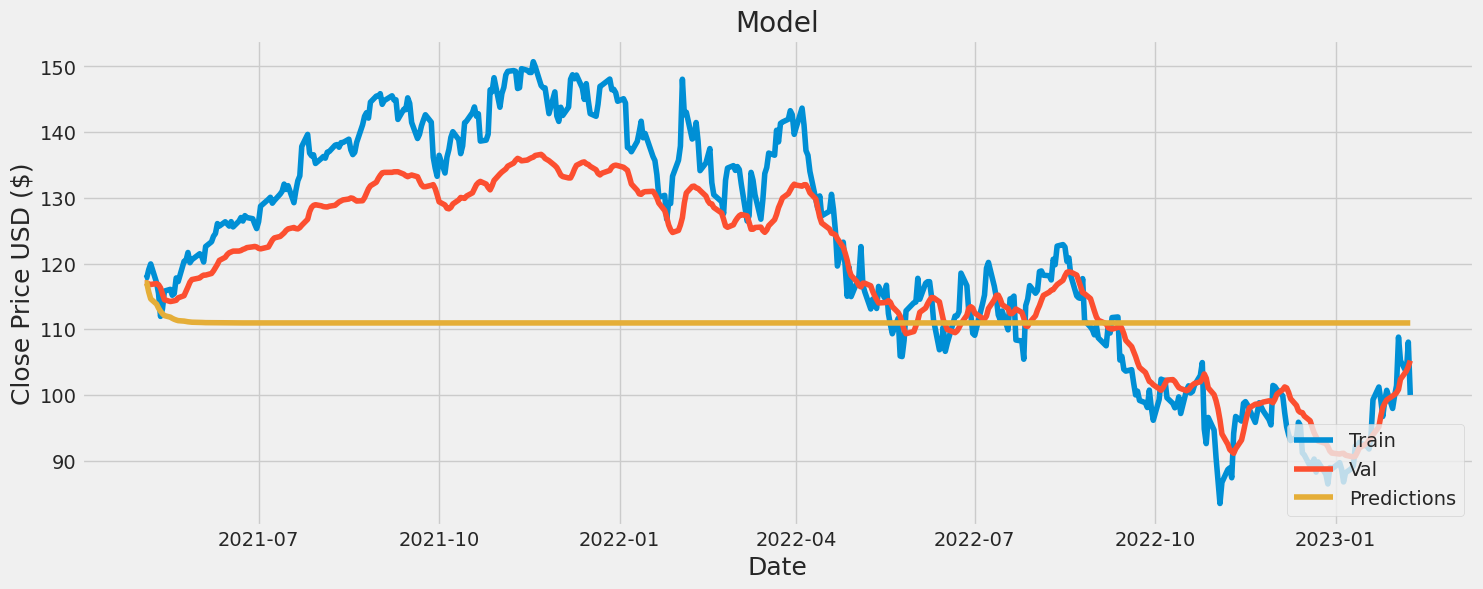

In [20]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Forecast'] = forecast
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
#10plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions', 'Forecast']])
plt.legend(['Train', 'Val', 'Predictions', 'Forecast'], loc='lower right')
plt.show()

In [41]:
from CV_quantum_layers import QuantumLayer_MultiQunode
quantumLayer = QuantumLayer_MultiQunode(
                                                    2,
                                                    1,
                                                    1,
                                                    5,
                                                    encoding_method="Amplitude_Phase",
                                                    regularizer='l1=0.01',
                                                    max_initial_weight=0.2
                                                    )

class QLSTM(tf.keras.layers.Layer):
    def __init__(self, units, **kwargs):
        self.units = 2*units
        self.state_size = [self.units, self.units]
        
        self.activation = activations.get('tanh')
        self.recurrent_activation = activations.get('hard_sigmoid')
        self.kernel_initializer = initializers.get('glorot_uniform')
        self.recurrent_initializer = initializers.get('orthogonal')
        self.bias_initializer = initializers.get('zeros')
        
        self.quantum_layer = QuantumLayer_MultiQunode(
                                                    n_qumodes,
                                                    n_circuits,
                                                    n_layers,
                                                    cutoff_dim,
                                                    encoding_method="Amplitude_Phase",
                                                    regularizer='l1=0.01',
                                                    max_initial_weight=None,
        )
        
        super(QLSTM, self).__init__(**kwargs)

    def build(self, input_shape):
        self.ft = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ft')
        self.ft_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='ft_b')
        self.c = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ct')
        self.c_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='c_b')
        self.o = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='ot')
        self.o_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='o_b')
        self.it = self.add_weight(shape=(input_shape[-1] + self.units, self.units),
                                      initializer=self.kernel_initializer,
                                      name='it')
        self.it_b = self.add_weight(shape=(self.units),
                                      initializer=self.bias_initializer,
                                      name='i_b')

        self.built = True

    def call(self, inputs, states):
        h,c = states[0], states[1]
        
        x = tf.concat([h,inputs], axis=-1)
        
        y_ft = self.recurrent_activation(dot(x, self.ft) + self.ft_b)
        
        y_it = self.recurrent_activation(dot(x, self.it) + self.it_b)
        
        y_c = self.activation(dot(x, self.c) + self.c_b)
        
        
        c = c * y_ft + y_it * y_c
        
        y_o = self.recurrent_activation(dot(x, self.o) + self.o_b)
        
        
        h = y_o * self.activation(c)
        
        output = h
        
        return output, [h,c]